In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Hamoye=pd.read_csv(r"C:\Users\RPN\Desktop\Hamoye.csv")

In [3]:
Hamoye

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


# Check for missing values

In [4]:
Hamoye.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

The Hamoye data currently has 180 missing values

# Fill the missing value

In [8]:
Hamoye.groupby('fuel_unit')['fuel_unit'].count()
Hamoye[['fuel_unit']] = Hamoye[['fuel_unit']].fillna(value='mcf')

In [9]:
Hamoye.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

The data currently does not have any missing value

# Which year has the highest average fuel cost per unit delivered?

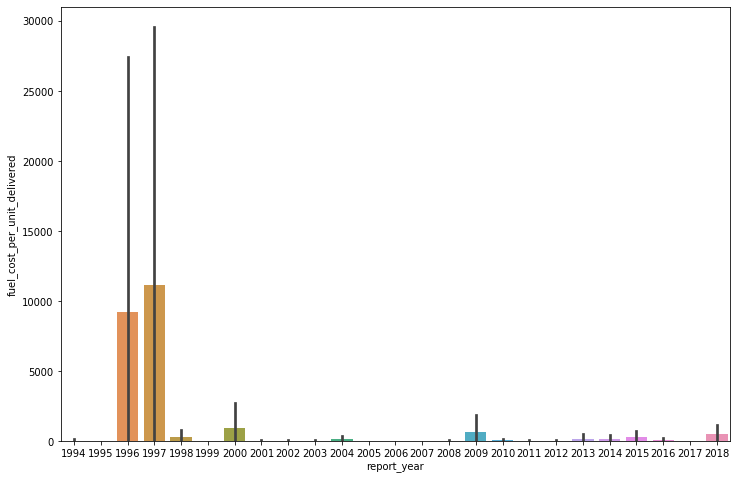

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(Hamoye['report_year'], Hamoye['fuel_cost_per_unit_delivered'])

In [15]:
Hamoye.groupby('fuel_cost_per_unit_delivered').mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu
fuel_cost_per_unit_delivered,,,,,,
-874.937,177.0,2008.0,811.000000,5.754000,86.628000,15.055
-488.054,177.0,2007.0,2240.000000,5.754000,77.605000,13.487
-313.410,210.0,2004.0,588.000000,5.712420,38.722000,6.779
-174.670,194.0,2000.0,77.333333,0.015500,-191.353333,-6.173
-170.187,6.0,2015.0,2292.000000,5.727204,123.751000,21.608
...,...,...,...,...,...,...
1942979.000,9.0,1997.0,52526.000000,0.000066,39.660000,0.560
2114508.000,9.0,1996.0,58795.000000,0.000065,35.964000,0.095
2255688.000,9.0,1997.0,36919.000000,0.000056,61.100000,1.087


In [108]:
Hamoye.groupby('fuel_cost_per_unit_delivered')['report_year'].mean()

fuel_cost_per_unit_delivered
-874.937        2008.0
-488.054        2007.0
-313.410        2004.0
-174.670        2000.0
-170.187        2015.0
                 ...  
 1942979.000    1997.0
 2114508.000    1996.0
 2255688.000    1997.0
 7793482.000    1996.0
 7964521.000    1997.0
Name: report_year, Length: 16675, dtype: float64

The year with the hightes average cost per unit delivered is 1997 with 7964521.000 as the highest average

# What is the skewness and kurtosis for the fuel quantity burned in 2 decimal place

In [22]:
Hamoye.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [31]:
Hamoye.fuel_qty_burned.skew()

15.851495469109503

From the above data, the skewness of fuel_qty_burned is 15.85(2.d.p)

In [23]:
Hamoye.kurt()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [32]:
Hamoye.fuel_qty_burned.kurt()

651.3694501337732

From the above data, the kurtosis of the fuel_qty_burned is 651.37(2.d.p)

# What is the standard deviation and 75th pecentile of the measure of energy per unit(fuel_mmtbu_per_unit) in 2.d.p 

In [44]:
Hamoye.fuel_mmbtu_per_unit.describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [45]:
Hamoye.fuel_mmbtu_per_unit.std()

10.600220307806886

# Which of the following fuel type has the lowest average fuel cost per unit burned ?

In [80]:
Hamoye.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel_type_code_pudl,,,,,,,,
coal,8547.0,67.421830,943.771433,0.00,23.9585,33.3180,44.66800,44033.320
gas,11486.0,13.659397,163.286631,0.00,3.2300,4.6500,6.96000,10490.000
nuclear,818.0,4955.157002,14291.929749,0.00,1.6015,32.5200,50.85525,69785.215
oil,8064.0,168.877086,2406.101479,0.00,37.6100,68.9455,98.68925,139358.000
other,167.0,18.253856,29.016882,-119.04,2.6325,9.0640,20.05500,134.547
waste,441.0,19.518122,29.988017,-276.08,10.3350,21.9330,32.65000,132.291


In [93]:
Hamoye.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values(ascending=False)

fuel_type_code_pudl
nuclear    4955.157002
oil         168.877086
coal         67.421830
waste        19.518122
other        18.253856
gas          13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

The fuel type with the lowest average fuel cost per unit burned is GAS with 13.659397

# How do you create an identity matrix in python

In [95]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994 ?

In [112]:
yearly_costs = Hamoye.groupby(["report_year", "fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].mean()

In [ ]:
# year_1994, year_1998 = yearly_costs.loc[[1994, 1998], "coal"]
percentage_change = ((year_1998 - year_1994) / (year_1994)) * 100
percentage_change

Since i didnt see this answer in the option i decided to guess the answer and also looking forward to finding more solutions

# Which feature has the second and the third lowest correlation with the fuel cost per unit burned ?

In [98]:
Hamoye.corr().loc['fuel_cost_per_unit_burned'].sort_values(ascending = False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

The third lowest correlation with the fuel cost per unit burned is fuel_mmbtu_per_unit with -0.010034

The second lowest correlation with the fuel cost per unit burned is fuel_qty_burned with -0.018535

# The feature with missing values fall under what category? What missing value imputation technique would you see?

The answer is CATEGORICAL AND MODE IMPUTATION 

# if you are given two lists A=[1,2,3,4,5,6], B=[13,21,34],  A_B = [1,2,3,4,5,6,13,21,34]

In [131]:
A = [1,2,3,4,5,6]

In [132]:
B = [13,21,34]

In [133]:
A.append(B)

In [138]:
print(A)

[1, 2, 3, 4, 5, 6, [13, 21, 34]]
